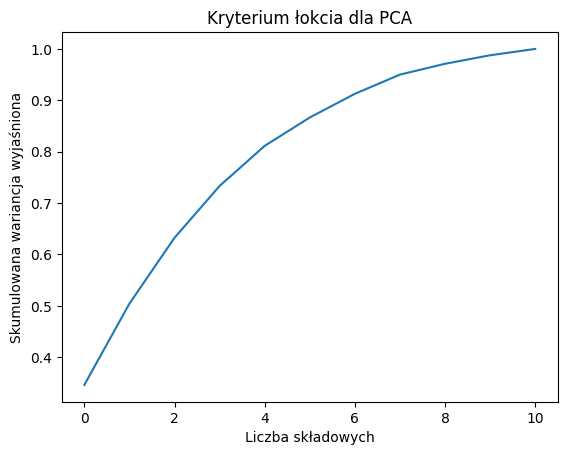

Optymalna liczba składowych dla 90.0% wariancji: 7


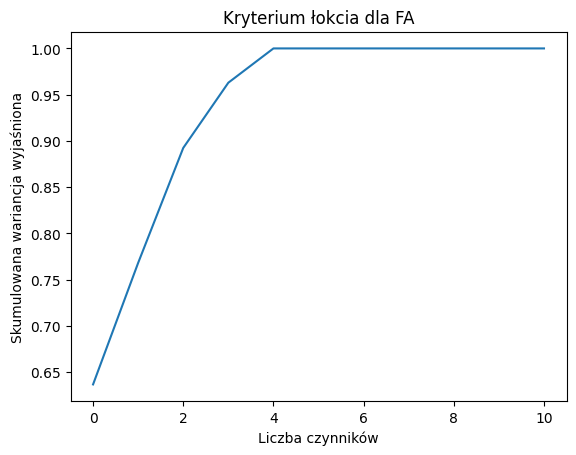

Optymalna liczba czynników dla 90.0% wariancji: 4


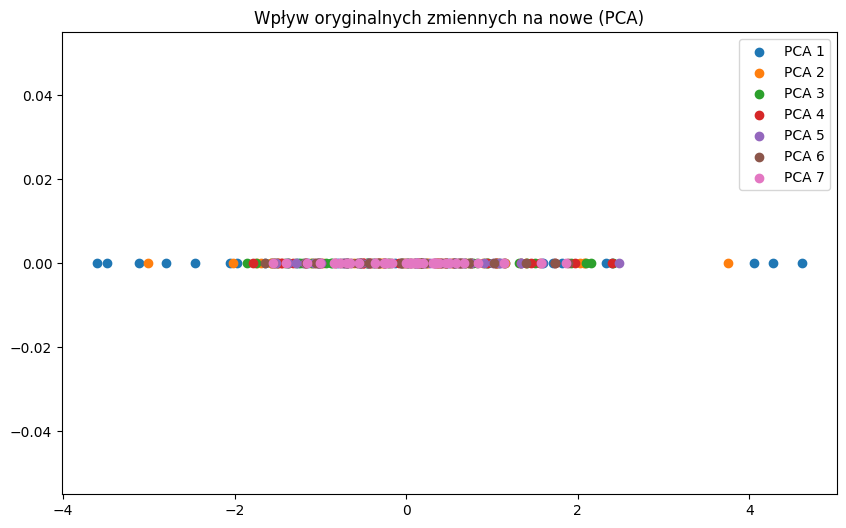

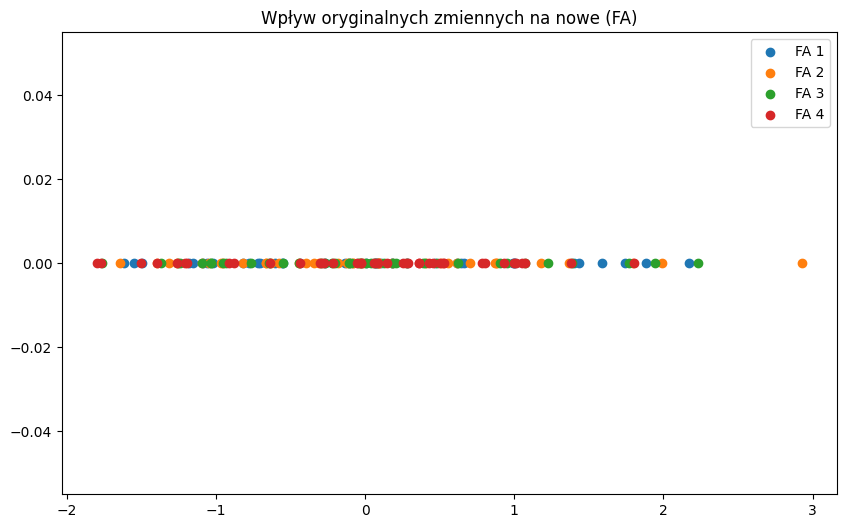

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('decathlon.csv')

# Wybór zmiennych niezależnych
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

# Standaryzacja danych
X_standardized = (X - X.mean()) / X.std()

# Inicjalizacja modelu PCA
pca = PCA()

# Dopasowanie modelu do danych
pca.fit(X_standardized)

# Wartości własne
explained_variance = pca.explained_variance_ratio_

# Kryterium łokcia
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Liczba składowych')
plt.ylabel('Skumulowana wariancja wyjaśniona')
plt.title('Kryterium łokcia dla PCA')
plt.show()

# Procent wariancji wyjaśnionej
target_variance = 0.90
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= target_variance) + 1

print(f"Optymalna liczba składowych dla {target_variance * 100}% wariancji: {optimal_components}")

# Inicjalizacja modelu FA
fa = FactorAnalysis()

# Dopasowanie modelu do danych
fa.fit(X_standardized)

# Wartości własne
explained_variance_fa = np.var(fa.components_, axis=1) / np.sum(np.var(fa.components_, axis=1))

# Kryterium łokcia
plt.plot(np.cumsum(explained_variance_fa))
plt.xlabel('Liczba czynników')
plt.ylabel('Skumulowana wariancja wyjaśniona')
plt.title('Kryterium łokcia dla FA')
plt.show()

# Procent wariancji wyjaśnionej
target_variance_fa = 0.90
cumulative_variance_fa = np.cumsum(explained_variance_fa)
optimal_components_fa = np.argmax(cumulative_variance_fa >= target_variance_fa) + 1

print(f"Optymalna liczba czynników dla {target_variance_fa * 100}% wariancji: {optimal_components_fa}")

# Wybór optymalnej liczby składowych/czynników
n_components_pca = 7
n_components_fa = 4

# PCA
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X_standardized)

# FA
fa = FactorAnalysis(n_components=n_components_fa)
X_fa = fa.fit_transform(X_standardized)

# Ilustracja wpływu oryginalnych zmiennych na nowe
def plot_pca(X_transformed, transformation_name):
    plt.figure(figsize=(10, 6))
    for i in range(n_components_pca):
        plt.scatter(X_transformed[:, i], np.zeros_like(X_transformed[:, i]), label=f'{transformation_name} {i + 1}')

    plt.title(f'Wpływ oryginalnych zmiennych na nowe ({transformation_name})')
    plt.legend()
    plt.show()

def plot_fa(X_transformed, transformation_name):
    plt.figure(figsize=(10, 6))
    for i in range(n_components_fa):
        plt.scatter(X_transformed[:, i], np.zeros_like(X_transformed[:, i]), label=f'{transformation_name} {i + 1}')

    plt.title(f'Wpływ oryginalnych zmiennych na nowe ({transformation_name})')
    plt.legend()
    plt.show()

# Ilustracja dla PCA
plot_pca(X_pca, 'PCA')

# Ilustracja dla FA
plot_fa(X_fa, 'FA')
